In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive


In [0]:
%cd "Colab Notebooks"

/gdrive/My Drive/Colab Notebooks


In [0]:
%ls

'Bitcoin Analysis.ipynb'                         difficulty.csv
 BTC_USD_2018-11-15_2019-10-14-CoinDesk.csv      hash-rate.csv
 BTC_USD_2018-11-15_2019-10-14-CoinDesk.gsheet  'NFL- Big Data Bowl.ipynb'
 data.csv                                        train.csv
 Data.csv                                        Untitled1.ipynb


In [0]:
import pandas as pd
btc=pd.read_csv("data.csv")

In [0]:
btc

,date,closing,open,high,low,difficulty,hashrate
0,14-10-2018 00:00,6361.417016,6329.977050,6408.601641,6319.713209,7.454970e+12,4.224709e+07
1,15-10-2018 00:00,6721.587503,6341.380722,7586.524634,6306.184686,7.454970e+12,6.003534e+07
2,16-10-2018 00:00,6724.833078,6723.097511,6897.033441,6679.922098,7.454970e+12,5.002945e+07
3,17-10-2018 00:00,6444.747010,6724.833124,6802.158612,6432.047212,7.454970e+12,5.114121e+07
4,18-10-2018 00:00,6374.648863,6450.064663,6486.474922,6335.173505,7.427360e+12,4.927449e+07
...,...,...,...,...,...,...,...
358,09-10-2019 00:00,8572.380812,8173.838803,8691.072691,8117.912240,1.275980e+13,8.753258e+07
359,10-10-2019 00:00,8582.144518,8572.382301,8654.382776,8435.186510,1.287480e+13,1.047550e+08
360,11-10-2019 00:00,8320.171581,8582.148123,8796.457282,8288.227631,1.300810e+13,1.008752e+08
361,12-10-2019 00:00,8328.604260,8320.168154,8406.142415,8225.301457,1.300810e+13,8.600255e+07


In [0]:
  for i in range(363):
  btc.iloc[i,0]=str(btc.iloc[i,0])[0:10]

IndentationError: ignored

In [0]:
btc

,date,closing,open,high,low,difficulty,hashrate
0,14-10-2018 00:00,6361.417016,6329.977050,6408.601641,6319.713209,7.454970e+12,4.224709e+07
1,15-10-2018 00:00,6721.587503,6341.380722,7586.524634,6306.184686,7.454970e+12,6.003534e+07
2,16-10-2018 00:00,6724.833078,6723.097511,6897.033441,6679.922098,7.454970e+12,5.002945e+07
3,17-10-2018 00:00,6444.747010,6724.833124,6802.158612,6432.047212,7.454970e+12,5.114121e+07
4,18-10-2018 00:00,6374.648863,6450.064663,6486.474922,6335.173505,7.427360e+12,4.927449e+07
...,...,...,...,...,...,...,...
358,09-10-2019 00:00,8572.380812,8173.838803,8691.072691,8117.912240,1.275980e+13,8.753258e+07
359,10-10-2019 00:00,8582.144518,8572.382301,8654.382776,8435.186510,1.287480e+13,1.047550e+08
360,11-10-2019 00:00,8320.171581,8582.148123,8796.457282,8288.227631,1.300810e+13,1.008752e+08
361,12-10-2019 00:00,8328.604260,8320.168154,8406.142415,8225.301457,1.300810e+13,8.600255e+07


In [0]:
btc.corr()

,closing,open,high,low,difficulty,hashrate
closing,1.000000,0.994496,0.996836,0.997597,0.747331,0.757125
open,0.994496,1.000000,0.996912,0.996319,0.755032,0.760645
high,0.996836,0.996912,1.000000,0.994689,0.739147,0.747907
low,0.997597,0.996319,0.994689,1.000000,0.757880,0.766303
difficulty,0.747331,0.755032,0.739147,0.757880,1.000000,0.937590
hashrate,0.757125,0.760645,0.747907,0.766303,0.937590,1.000000


In [0]:
btc.describe()

,closing,open,high,low,difficulty,hashrate
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02,3.630000e+02
mean,6726.820635,6720.527275,6899.152431,6530.590037,7.579633e+12,5.561770e+07
std,2833.103835,2831.156412,2933.489910,2712.352476,2.048668e+12,1.733913e+07
min,3194.962272,3178.299355,3227.867420,3122.342716,5.106420e+12,3.199801e+07
25%,3895.460381,3898.983570,3991.785399,3811.222499,6.068890e+12,4.314113e+07
50%,6341.094813,6338.781895,6394.783431,6292.721847,6.704630e+12,4.898699e+07
75%,9533.302481,9544.297051,9733.550745,9315.748843,9.013790e+12,6.555966e+07
max,12575.904070,12585.241970,13879.237710,12127.712180,1.300810e+13,1.084643e+08


In [0]:
import matplotlib.pyplot as plt
from datetime import datetime
import math
from sklearn.metrics import mean_squared_error
from itertools import product
import seaborn; seaborn.set()

In [0]:
btc.isnull().any()

date          False
closing       False
open          False
high          False
low           False
difficulty    False
hashrate      False
dtype: bool

In [0]:
y_hat_avg = btc.copy()
y_hat_avg['moving_avg_forecast'] = btc['closing'].rolling(60).mean().iloc[-1]

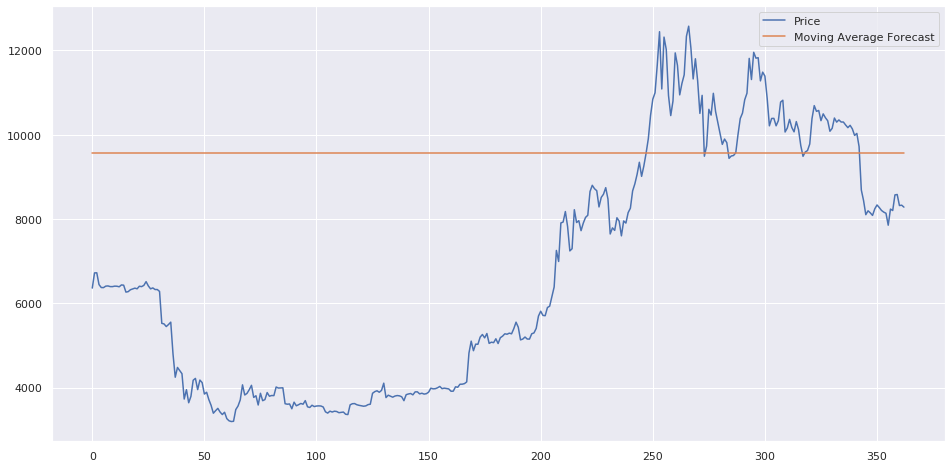

In [0]:
plt.figure(figsize=(16,8))
plt.plot(btc['closing'], label='Price')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [0]:
rolling = btc['closing'].ewm(com=200) # center of mass : 

data = pd.DataFrame({'input': weighted_Price, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()}) # moving avg : smoothning the data due to fluationi

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("EMA on log scale")
ax.lines[0].set_alpha(0.3)

NameError: ignored

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

high = btc['high'].values

print(high)

[ 6408.601641  7586.524634  6897.033441  6802.158612  6486.474922
  6407.227988  6438.790347  6472.834459  6437.074557  6434.977703
  6460.249804  6421.783207  6448.028506  6442.889414  6442.090373
  6439.457696  6313.272457  6394.783431  6376.656227  6409.156466
  6371.23797   6473.778438  6440.957228  6449.998745  6553.951932
  6530.733661  6433.253185  6396.877364  6380.813434  6391.766568
  6331.487634  6295.953866  5692.068952  5608.722588  5564.028968
  5638.976973  5610.149551  4888.622712  4631.902485  4591.879115
  4405.744585  4378.509892  4101.999387  4064.748217  3830.820142
  4341.439922  4400.462583  4299.976374  4251.369948  4255.954021
  4104.858957  4034.531558  3913.531776  3838.120977  3621.501257
  3475.930178  3642.41485   3591.236734  3428.100418  3474.391356
  3435.142473  3300.651394  3227.86742   3256.600326  3579.814884
  3573.240335  3929.098491  4160.296726  4164.550651  3929.859591
  4052.230547  4241.436134  4045.572084  3869.401164  3842.311793
  3945.244

In [0]:
train=btc.iloc[:300,:]
test=btc.iloc[300:,:]
train

,date,closing,open,high,low,difficulty,hashrate
0,14-10-2018 00:00,6361.417016,6329.977050,6408.601641,6319.713209,7.454970e+12,42247089.18
1,15-10-2018 00:00,6721.587503,6341.380722,7586.524634,6306.184686,7.454970e+12,60035337.26
2,16-10-2018 00:00,6724.833078,6723.097511,6897.033441,6679.922098,7.454970e+12,50029447.71
3,17-10-2018 00:00,6444.747010,6724.833124,6802.158612,6432.047212,7.454970e+12,51141213.22
4,18-10-2018 00:00,6374.648863,6450.064663,6486.474922,6335.173505,7.427360e+12,49274490.48
...,...,...,...,...,...,...,...
295,07-08-2019 00:00,11956.047220,11310.221640,12129.409740,11283.676110,9.985350e+12,75945274.30
296,08-08-2019 00:00,11817.455480,11956.022810,12032.046530,11502.527990,9.985350e+12,70485156.54
297,09-08-2019 00:00,11827.574570,11972.592950,12027.259910,11654.663250,9.985350e+12,72967028.25
298,10-08-2019 00:00,11278.281250,11827.574570,11967.877960,11227.622210,9.985350e+12,74952525.62


In [0]:
test

,date,closing,open,high,low,difficulty,hashrate
300,12-08-2019 00:00,11391.968650,11485.364080,11583.890700,11227.440660,9.985350e+12,6.601779e+07
301,13-08-2019 00:00,10869.379110,11391.963830,11434.888530,10746.755950,9.985350e+12,7.793077e+07
302,14-08-2019 00:00,10211.498580,10851.200470,10860.823970,10047.995130,9.985350e+12,7.544890e+07
303,15-08-2019 00:00,10386.539550,10211.509510,10444.079960,9682.711422,9.985350e+12,7.793077e+07
304,16-08-2019 00:00,10388.450590,10307.259760,10530.365310,9726.978150,9.985350e+12,7.296703e+07
...,...,...,...,...,...,...,...
358,09-10-2019 00:00,8572.380812,8173.838803,8691.072691,8117.912240,1.275980e+13,8.753258e+07
359,10-10-2019 00:00,8582.144518,8572.382301,8654.382776,8435.186510,1.287480e+13,1.047550e+08
360,11-10-2019 00:00,8320.171581,8582.148123,8796.457282,8288.227631,1.300810e+13,1.008752e+08
361,12-10-2019 00:00,8328.604260,8320.168154,8406.142415,8225.301457,1.300810e+13,8.600255e+07


In [0]:
model = AR(train['closing'])
model_fit = model.fit()

print("Lag: %s" % model_fit.k_ar)
print("Coefficients: %s" % model_fit.params)

pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#mse = mean_squared_error(test, pred)
#print("Test MSE {0:.3f}".format(mse))

Lag: 16
Coefficients: const          20.464802
L1.closing      0.884970
L2.closing      0.067414
L3.closing      0.119304
L4.closing     -0.038853
L5.closing      0.139069
L6.closing     -0.135448
L7.closing     -0.129883
L8.closing     -0.019196
L9.closing     -0.009988
L10.closing     0.200601
L11.closing    -0.024870
L12.closing     0.094537
L13.closing    -0.104232
L14.closing     0.083080
L15.closing    -0.248152
L16.closing     0.121030
dtype: float64


In [0]:
btc.date = pd.to_datetime(btc.date,infer_datetime_format=True)

# Resampling to daily frequency
btc.index = btc.date
btc = btc.resample('D').mean()

# Resampling to monthly frequency
btc_month = btc.resample('M').mean()

# Resampling to annual frequency
btc_year = btc.resample('A-DEC').mean()

# Resampling to quarterly frequency
btc_Q = btc.resample('Q-DEC').mean()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


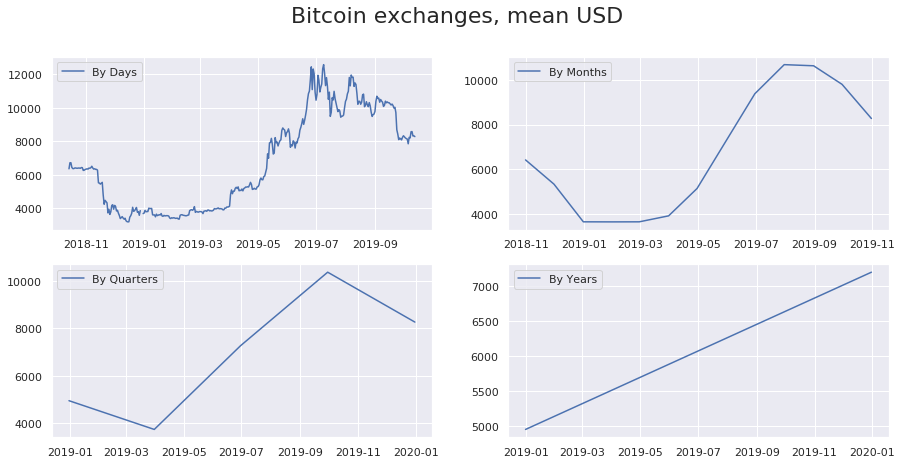

In [0]:

# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(btc.closing, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(btc_month.closing, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(btc_Q.closing, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(btc_year.closing, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [0]:
split = 50
btc_train = btc_month[:split]
btc_test = btc_month[split:len(btc_month)]

Dickey–Fuller test: p=0.138467


<Figure size 1080x504 with 0 Axes>

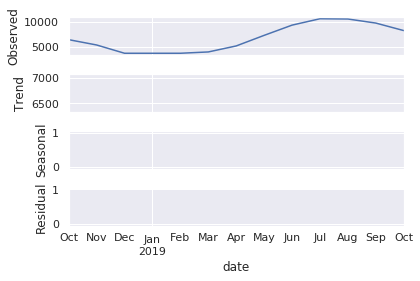

In [0]:
import statsmodels.api as sm
#Stationarity check and STL-decomposition of the series

plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(btc_train.closing).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(btc_train.closing)[1])
plt.show()

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [0]:
from scipy import stats
# Box-Cox Transformations
btc_train['Weighted_Price_box'], lmbda = stats.boxcox(btc_train.closing)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(btc_train.closing)[1])

Dickey–Fuller test: p=0.138467


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Initial approximation of parameters
import warnings
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(btc_train.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 0)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 0)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 0)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 0)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 0)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 0)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 0)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 0)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 0)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 0)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 0)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 0)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 0)
wrong pa

In [0]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

     parameters  aic
0  (0, 0, 0, 0)  2.0
                                 Statespace Model Results                                 
Dep. Variable:                 Weighted_Price_box   No. Observations:                   13
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                            Tue, 05 Nov 2019   AIC                              2.000
Time:                                    16:35:02   BIC                               -inf
Sample:                                10-31-2018   HQIC                               nan
                                     - 10-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10         -0       -inf      0.000       1e-10      

In [0]:
import numpy as np

# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

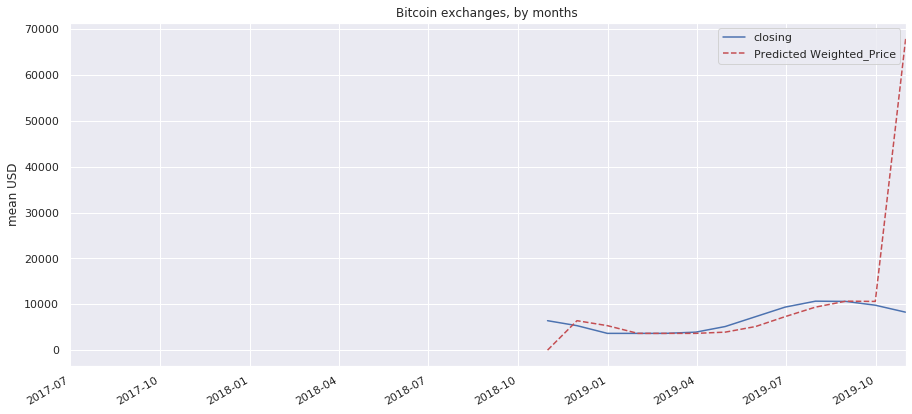

In [0]:
btc_month2 = btc_month[['closing']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month2 = pd.concat([btc_month2, future])
btc_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
btc_month2.closing.plot()
btc_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()